In [11]:
import re
import pandas as pd

# Read lines from the file
with open('../1733092424-run.out', 'r') as file:
    lines = file.readlines()

# Initialize a list to store parsed data
data = []

# Regular expressions to extract relevant fields
loaded_pattern = re.compile(r"loaded (\d+) elements from \"\.\/data\/(.*)\.csv\"")
sort_pattern = re.compile(r"sorting using (\S+) implementation")
elapsed_pattern = re.compile(r"elapsed: ([\d.]+)([µm]?s)")
branch_miss_pattern = re.compile(r"branch misses: (\d+)")

# Parse the log lines
for line in lines:
    loaded_match = loaded_pattern.search(line)
    num_elements = int(loaded_match.group(1))
    filename = loaded_match.group(2)
    sorting_method = sort_pattern.search(line).group(1)
    elapsed_match = elapsed_pattern.search(line)
    elapsed_time = float(elapsed_match.group(1))
    time_unit = elapsed_match.group(2)
    if time_unit == 'µs':  # Convert milliseconds to microseconds
        elapsed_time /= 1_000
    if time_unit == 's':
        elapsed_time *= 1_000
    branch_misses = int(branch_miss_pattern.search(line).group(1))

    data.append({
        "sorting_method": sorting_method,
        "num_elements": num_elements,
        "filename": filename,
        "elapsed_time_ms": elapsed_time,
        "branch_misses": branch_misses
    })

# Create a DataFrame
df = pd.DataFrame(data)

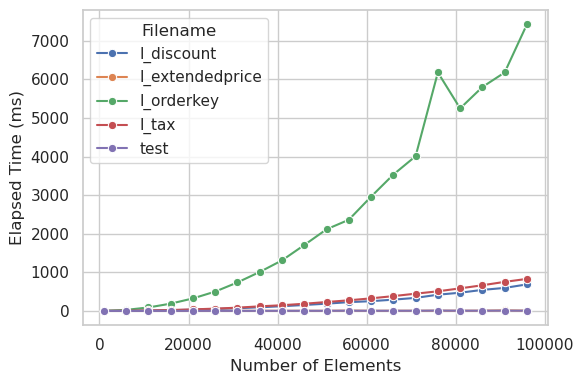

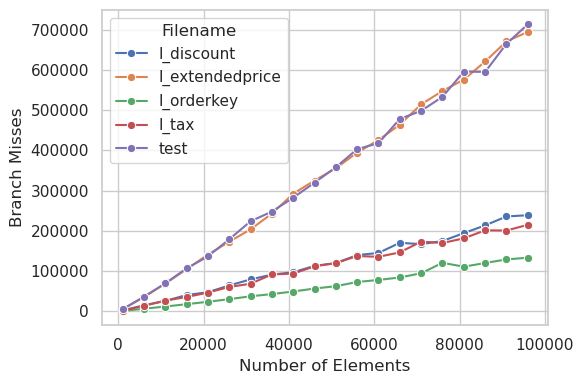

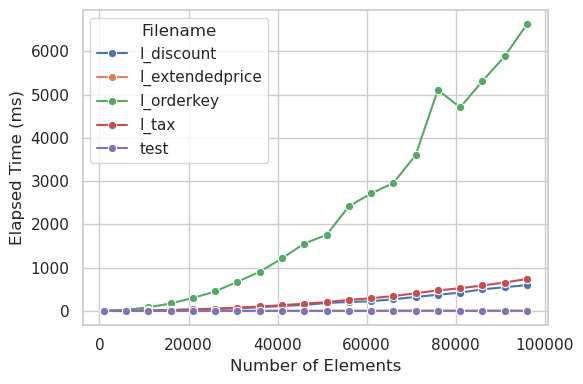

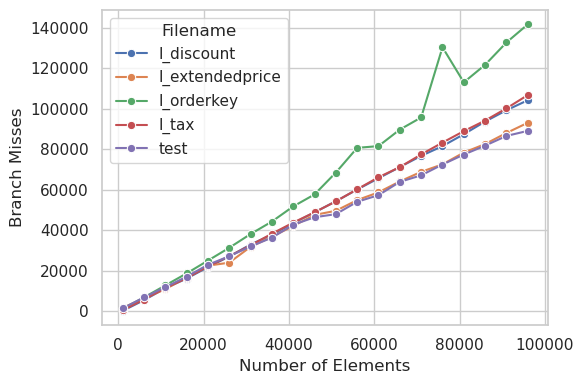

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Group by sorting method to create separate plots for each method
sorting_methods = df["sorting_method"].unique()

for sorting_method in sorting_methods:
    # Filter data for the current sorting method
    method_data = df[df["sorting_method"] == sorting_method]
    
    # Elapsed time plot
    plt.figure(figsize=(6, 4))
    sns.lineplot(
        data=method_data, 
        x="num_elements", 
        y="elapsed_time_ms", 
        hue="filename",
        marker="o"
    )
    # plt.title(f"Elapsed Time vs. Number of Elements ({sorting_method})")
    plt.xlabel("Number of Elements")
    plt.ylabel("Elapsed Time (ms)")
    plt.legend(title="Filename")
    plt.tight_layout()
    plt.savefig(f"{sorting_method}_elapsed.png", format="png", dpi=300)
    
    # Branch misses plot
    plt.figure(figsize=(6, 4))
    sns.lineplot(
        data=method_data, 
        x="num_elements", 
        y="branch_misses", 
        hue="filename", 
        marker="o"
    )
    # plt.title(f"Branch Misses vs. Number of Elements ({sorting_method})")
    plt.xlabel("Number of Elements")
    plt.ylabel("Branch Misses")
    plt.legend(title="Filename")
    plt.tight_layout()
    plt.savefig(f"{sorting_method}_misses.png", format="png", dpi=300)

In [21]:
# Filter data for the two sorting methods
branching = df[df["sorting_method"] == "branching"].set_index(["num_elements", "filename"])
conditional_assign = df[df["sorting_method"] == "condition-assign"].set_index(["num_elements", "filename"])

# Ensure alignment and calculate speedup
speedup = branching["elapsed_time_ms"] / conditional_assign["elapsed_time_ms"]

# Get descriptive statistics for the speedup
speedup_descriptives = speedup.describe()

print("Speedup Descriptive Statistics (Branching vs. Conditional Assign):")
print(speedup_descriptives)

Speedup Descriptive Statistics (Branching vs. Conditional Assign):
count    100.000000
mean       1.428694
std        0.543688
min        0.818818
25%        1.097203
50%        1.127588
75%        1.735818
max        3.876028
Name: elapsed_time_ms, dtype: float64
